# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

#### Import relevant libraries

In [1]:
# Standard libraries for data analysis (Pandas,Numpy and sklearn package):

import pandas as pd
from numpy import nan
import numpy as np
import sklearn
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#!pip install seaborn
#!pip3 install xgboost
#!pip install TPOT
import seaborn as sns
#print(sns.__version__)
#import warnings
#warnings.filterwarnings('ignore')


In [4]:
# sklearn libraries

# sklearn modules for data preprocessing:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA


#sklearn modules for Model Selection:

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


In [48]:
# Visual libraries

#Standard libraries for data visualization:

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

 


#### Import the dataset

In [5]:
# Import Bank Dataset 
dataset = pd.read_csv("dataset_bank.csv")


#### Evaluate data structure

In [6]:
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
# Check variable data types

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

print("Numeric columns:\n")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------\n")        
print("Categorical columns:\n ")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns:

CLIENTNUM
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
----------------------------------

Categorical columns:
 
Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [8]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Identify unique values

In [10]:
#Check unique values
dataset.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 47
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

## 1. Data preprocessing, normalization, missing data, categorical data

#### Remove Identification values

In [11]:
# Drop the column CLIENTNUM                   
dataset = dataset.drop(["CLIENTNUM"], axis = 1)

#### Missing values, Inconsistent values, Duplicate values


In [12]:
# Check for missing data

for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)

In [13]:
# Check for Unknown data

print('\n', dataset['Marital_Status'].value_counts())
print('\n', dataset['Education_Level'].value_counts())
print('\n', dataset['Income_Category'].value_counts())


 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


In [14]:
# Raplacement of the 'Unknown' data with NaN 

columns = ['Marital_Status','Education_Level','Income_Category']
dataset[columns]= dataset[columns].replace('Unknown', nan)

In [15]:
# Check for missing values

for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)

Education_Level
Marital_Status
Income_Category


In [16]:
# Replacement of NaN values with 'most_frequent'

simple_imputer = SimpleImputer(strategy='most_frequent')
dataset[columns] = simple_imputer.fit_transform(dataset[columns])


#### Identifying Outliers with Interquartile Range (IQR)

In [17]:
# Check for 'Months_on_book' column
# The first line of code below prints the skewness value for the 'Months_on_book'
# while the second line prints the summary statistics.

print(dataset['Months_on_book'].skew())
dataset['Months_on_book'].describe()

100.29059631376872


count    1.012700e+04
mean     3.742297e+07
std      3.193385e+09
min     -2.147484e+09
25%      3.100000e+01
50%      3.600000e+01
75%      4.000000e+01
max      3.210000e+11
Name: Months_on_book, dtype: float64

In [18]:
#Identifying Outliers with Visualization

plt.boxplot(dataset["Months_on_book"])
plt.show() 
#dataset.Months_on_book.hist()

#The above chart shows that the distribution is right-skewed, 
#and there are extreme higher values at the right of the histogram.

NameError: name 'plt' is not defined

In [19]:
# It is obiviously that 'Months_on_book' feauture has outliers as it is min. value =-2.147484e+09 and max. value =3.210000e+11
#The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between 
# the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1

Q1 = dataset['Months_on_book'].quantile(0.25)
Q3 = dataset['Months_on_book'].quantile(0.75)
IQR = Q3 - Q1

print('The interquartile range (IQR):',IQR)

The interquartile range (IQR): 9.0


#### Outlier Treatment

In [20]:
# The values range and most common value

print("The range between min and max values without outliers is from", 
      dataset['Months_on_book'].quantile(0.002),'up to', dataset['Months_on_book'].quantile(0.99))

print("The most common values are between:", 
      dataset['Months_on_book'].quantile(0.50),'and', dataset['Months_on_book'].quantile(0.95))


The range between min and max values without outliers is from 13.0 up to 56.0
The most common values are between: 36.0 and 50.0


In [21]:
# Replacing Outliers (the extreme values) with median values. 
# It is advised to not use MEAN values as they are affected by outliers.

dataset['Months_on_book'] = np.where(dataset['Months_on_book'] > 56, 36, dataset['Months_on_book'])
dataset['Months_on_book'] = np.where(dataset['Months_on_book'] < 13, 36, dataset['Months_on_book'])
print('New skewness value =', dataset['Months_on_book'].skew())



New skewness value = -0.10693284673560063


In [22]:
# Final check for missing values 

for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)


### Numerical and Categorical variables

We combine features into two lists so that we can analyze them jointly

In [23]:
#Categorical and Numeric columns dividing

categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
numeric_columns=[x for x in dataset.dtypes.index if is_numeric_dtype(dataset[x])]

print ('Categorical columns:\n',categorical_columns)
print('\nNumeric columns:\n',numeric_columns)

Categorical columns:
 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

Numeric columns:
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [24]:
# Calculate skew and sort
# The coefficient of skewness is a measure of asymmetry in the distribution.
# A positive skew indicates a longer tail to the right, while a negative skew indicates a longer tail to the left.
# A perfectly symmetric distribution, like the normal distribution, has a skew equal to zero.

skew_feats = dataset[numeric_columns].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_feats})

skewness

,skew
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061
Total_Trans_Ct,0.153673
Contacts_Count_12_mon,0.011006
Dependent_count,-0.020826


<AxesSubplot:>

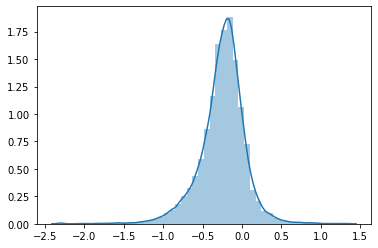

In [25]:
#Log Transform on skewed data Total_Ct_Chng_Q4_Q1

dataset = dataset.assign(Total_Ct_Chng_Q4_Q1_norm = np.log(dataset['Total_Ct_Chng_Q4_Q1']+0.1))

Total_Ct_Chng_Q4_Q1_norm = [dataset['Total_Ct_Chng_Q4_Q1_norm'].values]
sns.distplot(Total_Ct_Chng_Q4_Q1_norm, label='Total_Ct_Chng_Q4_Q1')

<AxesSubplot:xlabel='Total_Trans_Amt_norm'>

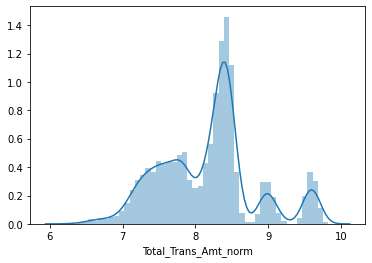

In [26]:
#Log Transform on skewed data Total_Trans_Amt

dataset = dataset.assign(Total_Trans_Amt_norm = np.log(dataset['Total_Trans_Amt']+0.1))
sns.distplot(dataset['Total_Trans_Amt_norm'], label='Total_Trans_Amt')

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1_norm'>

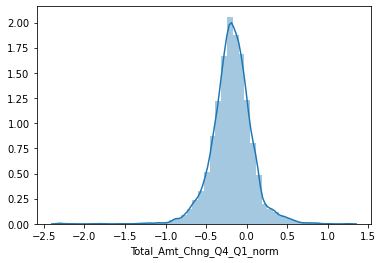

In [27]:
#Log Transform on skewed data Total_Amt_Chng_Q4_Q1

dataset = dataset.assign(Total_Amt_Chng_Q4_Q1_norm = np.log(dataset['Total_Amt_Chng_Q4_Q1']+0.1))
sns.distplot(dataset['Total_Amt_Chng_Q4_Q1_norm'], label='Total_Amt_Chng_Q4_Q1_norm')

<AxesSubplot:>

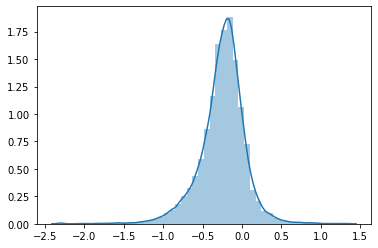

In [28]:
#Log Transform on skewed data Total_Ct_Chng_Q4_Q1

dataset = dataset.assign(Total_Ct_Chng_Q4_Q1_norm = np.log(dataset['Total_Ct_Chng_Q4_Q1']+0.1))

Total_Ct_Chng_Q4_Q1_norm = [dataset['Total_Ct_Chng_Q4_Q1_norm'].values]
sns.distplot(Total_Ct_Chng_Q4_Q1_norm, label='Total_Ct_Chng_Q4_Q1')

<AxesSubplot:xlabel='Avg_Open_To_Buy_norm'>

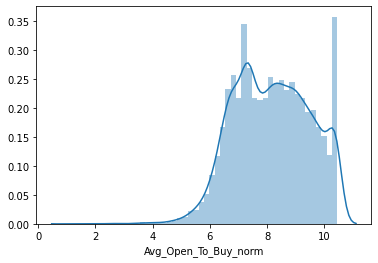

In [29]:
#Log Transform on skewed data Avg_Open_To_Buy

dataset = dataset.assign(Avg_Open_To_Buy_norm = np.log(dataset['Avg_Open_To_Buy']+0.1))
sns.distplot(dataset['Avg_Open_To_Buy_norm'], label='Avg_Open_To_Buy_norm')

<AxesSubplot:xlabel='Credit_Limit_norm'>

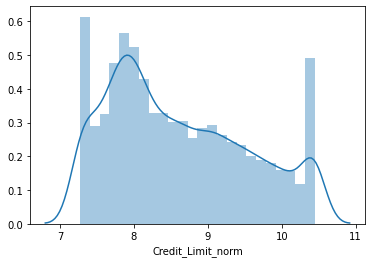

In [30]:
#Log Transform on skewed data Credit_Limit

dataset = dataset.assign(Credit_Limit_norm = np.log(dataset['Credit_Limit']+0.1))
sns.distplot(dataset['Credit_Limit_norm'], label='Credit_Limit_norm')

<AxesSubplot:xlabel='Avg_Utilization_Ratio_norm'>

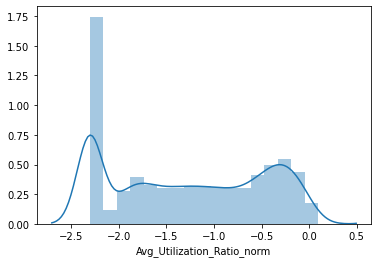

In [31]:
#Log Transform on skewed data

dataset = dataset.assign(Avg_Utilization_Ratio_norm = np.log(dataset['Avg_Utilization_Ratio']+0.1))
sns.distplot(dataset['Avg_Utilization_Ratio_norm'], label='Avg_Utilization_Ratio_norm')

## Scaling

In [32]:
#RobustScaler

from sklearn.preprocessing import RobustScaler

columns = ['Total_Ct_Chng_Q4_Q1_norm','Credit_Limit_norm','Avg_Open_To_Buy_norm','Total_Amt_Chng_Q4_Q1_norm','Avg_Utilization_Ratio_norm']
transformer = RobustScaler()

dataset[columns] = transformer.fit_transform(dataset[columns])

In [33]:
#Min-Max Scaler -Age
from sklearn.preprocessing import MinMaxScaler

column = ['Customer_Age']

transformer = MinMaxScaler(feature_range=(0,1))
dataset[column] = transformer.fit_transform(dataset[column])

In [34]:
print("Minimum value of Age is :", dataset['Customer_Age'].min())
print("Maximum value of Age is :", dataset['Customer_Age'].max())

Minimum value of Age is : 0.0
Maximum value of Age is : 0.9999999999999999


In [35]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler

column_ = ['Total_Revolving_Bal','Total_Trans_Amt']
transformer = StandardScaler()
dataset[column_] = transformer.fit_transform(dataset[column_])

### Choosing target columns

In [36]:
# Mapping Attrited_Flag

mapper = {'Attrited Customer': 1, 'Existing Customer': 0}
dataset = dataset.assign(Attrition_Flag = dataset['Attrition_Flag'].replace(mapper))
dataset

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Total_Amt_Chng_Q4_Q1_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm
0,0,0.404255,M,3,High School,Married,$60K - $80K,Blue,39.0,5,...,-0.959707,42,1.625,0.061,2.577244,7.042374,1.990188,0.613957,0.699877,-0.339048
1,0,0.489362,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,...,-0.916433,33,3.714,0.105,5.247290,7.163250,2.484302,0.376168,0.406583,-0.187070
2,0,0.531915,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,...,-0.740982,20,2.333,0.000,3.734496,7.542797,4.310314,-0.008096,-0.194992,-0.638617
3,0,0.297872,F,4,High School,Married,Less than $40K,Blue,34.0,3,...,-0.951758,20,2.333,0.760,3.734496,7.065699,2.165628,-0.734010,-0.216276,0.714920
4,0,0.297872,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,...,-1.056263,28,2.500,0.000,3.957893,6.704537,3.687622,0.152269,0.024594,-0.638617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0.510638,M,2,Graduate,Single,$40K - $60K,Blue,40.0,3,...,3.259358,117,0.857,0.462,0.594596,9.647052,-0.148351,-0.238577,-0.087221,0.447308
10123,1,0.319149,M,2,Graduate,Divorced,$40K - $60K,Blue,25.0,4,...,1.283475,69,0.683,0.511,-0.080681,9.078419,0.288056,-0.252901,-0.042058,0.499893
10124,1,0.382979,F,1,High School,Married,Less than $40K,Blue,36.0,5,...,1.732994,60,0.818,0.000,0.454588,9.239035,0.348675,0.220570,0.118118,-0.638617
10125,1,0.085106,M,2,Graduate,Married,$40K - $60K,Blue,36.0,4,...,1.174848,62,0.722,0.000,0.082888,9.035403,-1.012988,0.208640,0.101782,-0.638617


#### Check target variable distribution

In [37]:
dataset["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

#### Split the dataset into dependent and independent variables:

In [38]:
X = dataset.drop(['Attrition_Flag'], axis = 1)
y = dataset['Attrition_Flag']

#### Encode Categorical data: CatBoost Encoding

In [39]:
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [40]:
import category_encoders as ce

count_encoder = ce.CatBoostEncoder(cols=cat_features)

X[cat_features] = count_encoder.fit_transform(X[cat_features],y)

In [76]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Total_Amt_Chng_Q4_Q1_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm
0,0.404255,0.160660,3,0.16066,0.160660,0.16066,0.160660,39.0,5,1,3,-0.473422,42,2.577244,7.042374,1.990188,0.613957,0.699877,-0.339048
1,0.489362,0.160660,5,0.16066,0.160660,0.16066,0.080330,44.0,6,1,2,-0.366667,33,5.247290,7.163250,2.484302,0.376168,0.406583,-0.187070
2,0.531915,0.080330,3,0.08033,0.080330,0.16066,0.053553,36.0,4,1,0,-1.426858,20,3.734496,7.542797,4.310314,-0.008096,-0.194992,-0.638617
3,0.297872,0.080330,4,0.08033,0.053553,0.08033,0.040165,34.0,3,4,1,1.661686,20,3.734496,7.065699,2.165628,-0.734010,-0.216276,0.714920
4,0.297872,0.053553,3,0.16066,0.040165,0.08033,0.032132,21.0,5,1,0,-1.426858,28,3.957893,6.704537,3.687622,0.152269,0.024594,-0.638617


# 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

####   Clean the dataset

In [41]:
X=X.drop(['Total_Ct_Chng_Q4_Q1','Credit_Limit','Avg_Open_To_Buy',
          'Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Trans_Amt'], axis=1)

#### Plot Correlation Matrix of all independent variables

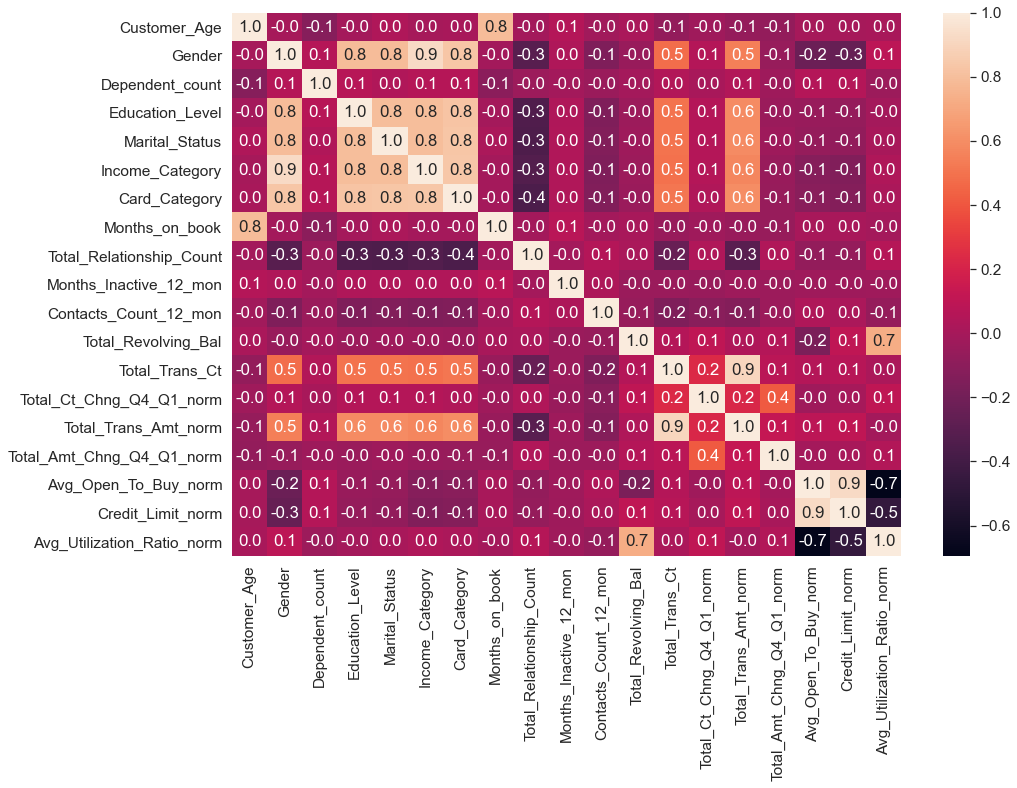

In [75]:
correlation_matrix = X.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f')
plt.show()

### Splitting the Training and Testing sets 

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
print("", X_train.shape, X_test.shape, '\n', y_train.shape, '  ', y_test.shape)

 (7088, 19) (3039, 19) 
 (7088,)    (3039,)


#### SMOTE

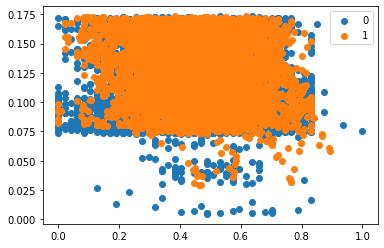

In [49]:
from collections import Counter
from numpy import where

counter = Counter(y_train)
X_ = np.asarray(X_train)
y_ = np.asarray(y_train)

# visualise the classes

for label, items in counter.items():
     row = where(y_ == label)[0]
     plt.scatter(X_[row, 0], X_[row, 1], label=str(label))
plt.legend()
plt.show()

In [50]:
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample       = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 5917, 1: 5917})
Counter({0: 5917, 1: 5917})


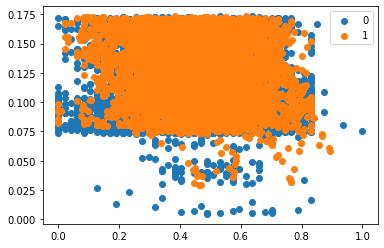

In [51]:
# Visualized dataset again to check the distribution again

counter = Counter(y_train)
X_ = np.asarray(X_train)
y_ = np.asarray(y_train)

# visualise the classes
for label, items in counter.items():
     row = where(y_ == label)[0]
     plt.scatter(X_[row, 0], X_[row, 1], label=str(label))
plt.legend()
plt.show()

In [52]:
#Check the dataset shape

print("", X_train.shape, X_test.shape, '\n', y_train.shape, '  ', y_test.shape)

 (11834, 19) (3039, 19) 
 (11834,)    (3039,)


# 3. Classification models
- classical classification models


### DecisionTreeClassifier

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,DecisionTreeClassifier,0.952287,0.811623,0.888158,0.848168,0.875059


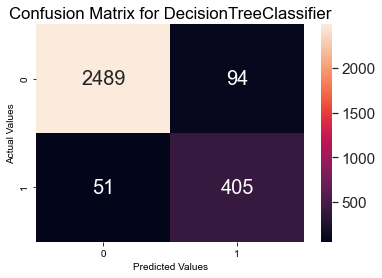

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Predict
y_pred_tree = tree.predict(X_test)

#Evaluate Model Results on Test Set:
acc_tree   = accuracy_score(y_test, y_pred_tree )
prec_tree  = precision_score(y_test, y_pred_tree )
rec_tree   = recall_score(y_test, y_pred_tree )
f1_tree    = f1_score(y_test, y_pred_tree )

Mean_score_tree = ((acc_tree+prec_tree+rec_tree+f1_tree)/4)

#Get the confusion matrix
cf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_tree, annot=True, fmt='g', annot_kws={"size": 20}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for DecisionTreeClassifier')

data_tree = {'Classifier':     ['DecisionTreeClassifier'],
            'Accuracy_score':  [acc_tree],
            'Precision_score': [prec_tree], 
            'Recall_score':    [rec_tree],
            'F1_score':        [f1_tree],
            'Mean_score':      [Mean_score_tree]
             }

comparison_tree = pd.DataFrame (data_tree, columns = ['Classifier','Accuracy_score','Precision_score', 
                                                      'Recall_score','F1_score','Mean_score'])
comparison_tree

### Support Vector Machine - SVM

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,SVM,0.904903,0.661509,0.75,0.70298,0.754848


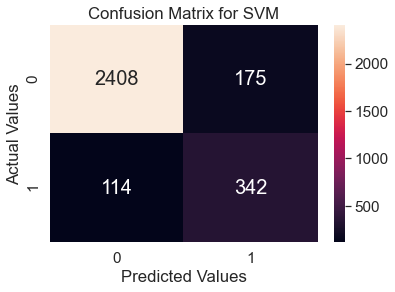

In [54]:
from sklearn.svm import SVC 
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

#Predict
y_pred_svm= svm.predict(X_test)

#Evaluate Model Results on Test Set:
acc_svm   = accuracy_score(y_test, y_pred_svm )
prec_svm  = precision_score(y_test, y_pred_svm )
rec_svm   = recall_score(y_test, y_pred_svm )
f1_svm    = f1_score(y_test, y_pred_svm )

Mean_score_svm = ((acc_svm+prec_svm+rec_svm+f1_svm)/4)

#Get the confusion matrix
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_svm, annot=True, fmt='g',annot_kws={"size": 20}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for SVM')

data_svm = {'Classifier':      ['SVM'],
            'Accuracy_score':  [acc_svm],
            'Precision_score': [prec_svm], 
            'Recall_score':    [rec_svm],
            'F1_score':        [f1_svm],
            'Mean_score':      [Mean_score_svm]
            }

comparison_svm = pd.DataFrame (data_svm, columns = ['Classifier','Accuracy_score','Precision_score', 
                                                    'Recall_score','F1_score','Mean_score'])
comparison_svm

### Random Forest Classifier

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,RandomForestClassifier,0.974992,0.909483,0.925439,0.917391,0.931826


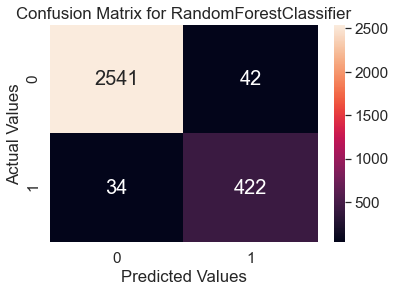

In [55]:
from sklearn.ensemble import RandomForestClassifier

rnd = RandomForestClassifier()
rnd.fit(X_train, y_train)

#Predict
y_pred_rnd = rnd.predict(X_test)

#Evaluate Model Results on Test Set:
acc_rnd   = accuracy_score(y_test, y_pred_rnd )
prec_rnd  = precision_score(y_test, y_pred_rnd )
rec_rnd   = recall_score(y_test, y_pred_rnd )
f1_rnd    = f1_score(y_test, y_pred_rnd )

Mean_score_rnd =((acc_rnd+prec_rnd+rec_rnd+f1_rnd)/4)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rnd)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix, annot=True, fmt='g',annot_kws={"size": 20}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for RandomForestClassifier')

data_rnd = {'Classifier':      ['RandomForestClassifier'],
            'Accuracy_score':  [acc_rnd],
            'Precision_score': [prec_rnd], 
            'Recall_score':    [rec_rnd],
            'F1_score':        [f1_rnd],
            'Mean_score':      [Mean_score_rnd]
            }

comparison_rnd = pd.DataFrame (data_rnd, columns = ['Classifier','Accuracy_score','Precision_score', 
                                                    'Recall_score','F1_score','Mean_score'])
comparison_rnd

### KNeighbors Classifier - KNN

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,KNeighborsClassifier,0.839092,0.478029,0.787281,0.594863,0.674816


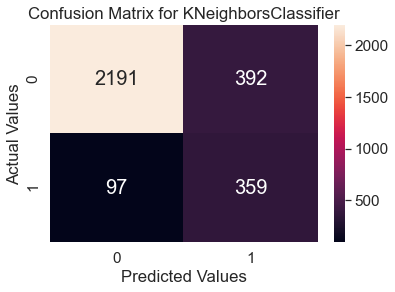

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train )

#Predict
y_pred_knn = knn_model.predict(X_test)

#Evaluate Model Results on Test Set:
acc_knn   = accuracy_score(y_test, y_pred_knn )
prec_knn  = precision_score(y_test, y_pred_knn )
rec_knn   = recall_score(y_test, y_pred_knn )
f1_knn    = f1_score(y_test, y_pred_knn )

Mean_score_knn = ((acc_knn+prec_knn+rec_knn+f1_knn)/4)

#Get the confusion matrix
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_knn, annot=True, fmt='g',annot_kws={"size": 20}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for KNeighborsClassifier')

data_knn = {'Classifier':  ['KNeighborsClassifier'],
            'Accuracy_score':  [acc_knn],
            'Precision_score': [prec_knn], 
            'Recall_score':    [rec_knn],
            'F1_score':        [f1_knn],
            'Mean_score':      [Mean_score_knn]
            }

comparison_knn = pd.DataFrame (data_knn, columns = ['Classifier','Accuracy_score','Precision_score', 
                                                    'Recall_score','F1_score','Mean_score'])
comparison_knn

### GaussianNB 


,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,GaussianNB,0.881211,0.578773,0.765351,0.659112,0.721112


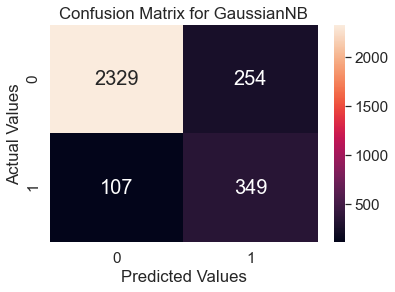

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#Predict
y_pred_gnb = gnb.predict(X_test)

#Evaluate Model Results on Test Set:
acc_gnb   = accuracy_score(y_test, y_pred_gnb )
prec_gnb  = precision_score(y_test, y_pred_gnb )
rec_gnb   = recall_score(y_test, y_pred_gnb )
f1_gnb    = f1_score(y_test, y_pred_gnb )

Mean_score_gnb = ((acc_gnb+prec_gnb+rec_gnb+f1_gnb)/4)

#Get the confusion matrix
cf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_gnb, annot=True, fmt='g',annot_kws={"size": 20}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for GaussianNB')

data_gnb = {'Classifier':      ['GaussianNB'],
            'Accuracy_score':  [acc_gnb],
            'Precision_score': [prec_gnb], 
            'Recall_score':    [rec_gnb],
            'F1_score':        [f1_gnb],
            'Mean_score':      [Mean_score_gnb]
            }

comparison_gnb = pd.DataFrame (data_gnb, columns = ['Classifier','Accuracy_score','Precision_score', 
                                                    'Recall_score','F1_score','Mean_score'])
comparison_gnb

### XGBoost Classifier

[11:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,XGBClassifier,0.978282,0.923913,0.932018,0.927948,0.94054


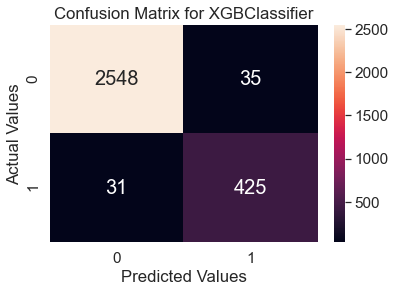

In [59]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

use_label_encoder=False 
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

#Predict
y_pred_xgb = xgb.predict(X_test)

#Evaluate Model Results on Test Set:
acc_xgb   = accuracy_score(y_test, y_pred_xgb )
prec_xgb  = precision_score(y_test, y_pred_xgb )
rec_xgb   = recall_score(y_test, y_pred_xgb )
f1_xgb    = f1_score(y_test, y_pred_xgb )

Mean_score_xgb=((acc_xgb+prec_xgb+rec_xgb+f1_xgb)/4)

#Get the confusion matrix
cf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_xgb, annot=True, fmt='g',annot_kws={"size": 20}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for XGBClassifier')

data_xgb = {'Classifier':  ['XGBClassifier'],
            'Accuracy_score': [acc_xgb],
            'Precision_score': [prec_xgb], 
            'Recall_score': [rec_xgb],
            'F1_score': [f1_xgb],
            'Mean_score':[Mean_score_xgb]
            }

comparison_xgb = pd.DataFrame (data_xgb, columns = ['Classifier','Accuracy_score','Precision_score', 
                                                    'Recall_score','F1_score','Mean_score'])
comparison_xgb

# 4. Evaluation and comparisons, various metrics

## Comparison Table

In [60]:
data_total = {'Classifier':  ['DecisionTreeClassifier',
                              'SVM',
                              'RandomForestClassifier',
                              'KNeighborsClassifier',
                              'GaussianNB',
                              'XGBClassifier'],
              
            'Accuracy_score':  [acc_tree,acc_svm,acc_rnd,acc_knn,acc_gnb,acc_xgb],
            'Precision_score': [prec_tree,prec_svm,prec_rnd,prec_knn,prec_gnb,prec_xgb],
            'Recall_score':    [rec_tree,rec_svm,rec_rnd,rec_knn,rec_gnb,rec_xgb],
            'F1_score':        [f1_tree,f1_svm,f1_rnd,f1_knn,f1_gnb,f1_xgb],
            'Mean_score':      [Mean_score_tree,Mean_score_svm,Mean_score_rnd,Mean_score_knn,Mean_score_gnb,Mean_score_xgb]
            }

comparison_total = pd.DataFrame (data_total,columns = ['Classifier','Accuracy_score', 'Precision_score', 
                                                       'Recall_score','F1_score', 'Mean_score'])
comparison_total

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,DecisionTreeClassifier,0.952287,0.811623,0.888158,0.848168,0.875059
1,SVM,0.904903,0.661509,0.750000,0.702980,0.754848
2,RandomForestClassifier,0.974992,0.909483,0.925439,0.917391,0.931826
3,KNeighborsClassifier,0.839092,0.478029,0.787281,0.594863,0.674816
4,GaussianNB,0.881211,0.578773,0.765351,0.659112,0.721112
5,XGBClassifier,0.978282,0.923913,0.932018,0.927948,0.940540


### ROC Curve analysis

[11:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


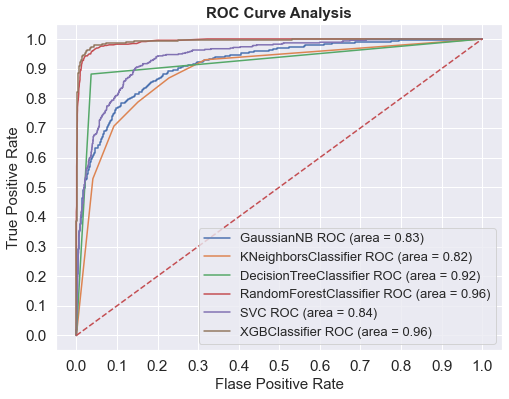

In [61]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

plt.figure(figsize=(8,6))

# Add the models to the list that you want to view on the ROC plot----------------
models = [
{   'label': 'GaussianNB','model':GaussianNB(),},
{   'label': 'KNeighborsClassifier','model':KNeighborsClassifier(),},
{   'label': 'DecisionTreeClassifier', 'model':DecisionTreeClassifier(),},
{   'label': 'RandomForestClassifier','model': RandomForestClassifier(),},
{   'label': 'SVC','model': SVC(gamma='auto',probability=True),},
{   'label': 'XGBClassifier','model': XGBClassifier(),}
]

# Below for loop iterates through your models list--------------------------------
for m in models:
    model = m['model']                # select the model
    model.fit(X_train, y_train)       # train the model
    y_pred = model.predict(X_test)    # predict the test data
    
# Compute False postive rate, and True positive rate------------------------------
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot---------------------------
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values---------------------------------------------------
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot---------------------------------------------------- 
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0.0, 1.1, step=0.1))
#plt.ylim([0.0, 1.05])
plt.yticks(np.arange(0.0, 1.1, step=0.1))

plt.xlabel("Flase Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()  

In [62]:
#check
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
auc_xgb

0.959233704179147

## 5. Hyperparameter Optimization

### Randomized Search _ XGBClassifier

In [63]:
from sklearn.model_selection import RandomizedSearchCV
estimator = XGBClassifier()

parameters = {  'max_depth':        [2,3,4,5,6,8,10,12,15],
                'n_estimators':     [50, 100,150,200,400,600],
                'learning_rate':    [0.05, 0.10,0.15, 0.20,0.25,0.30],
                'min_child_weight': [2,3,5,7,9],
                'gamma':            [0.0, 0.1, 0.2, 0.3, 0,4]
             }

random_search = RandomizedSearchCV(
                estimator = estimator, 
                param_distributions = parameters, 
                n_iter=5, 
                scoring = 'roc_auc',
                n_jobs = -1,
                cv=5, 
                verbose=3
                )

random_search.fit(X_train, y_train)
print('\nAccuracy on the training subset ',(random_search.score(X_train, y_train)))
print('Accuracy on the test subset:',      (random_search.score(X_test, y_test)))



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[11:12:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy on the training subset  1.0
Accuracy on the test subset: 0.9941800639810909


In [64]:
#Random search best model prediction

y_pred_random = random_search.best_estimator_.predict(X_test)

In [65]:
# Random Search results

acc_xgb_random       = accuracy_score(y_test, y_pred_random)
prec_xgb_random      = precision_score(y_test, y_pred_random )
rec_xgb_random       = recall_score(y_test, y_pred_random )
f1_xgb_random        = f1_score(y_test, y_pred_random )
Mean_score_xgb_rand  = ((acc_xgb_random+prec_xgb_random+rec_xgb_random+f1_xgb_random)/4)

data_xgb_random      = { 'Classifier':     ['XGBClassifier_Random'],
                        'Accuracy_score':  [acc_xgb_random],
                        'Precision_score': [prec_xgb_random], 
                        'Recall_score':    [rec_xgb_random],
                        'F1_score':        [f1_xgb_random],
                        'Mean_score':      [Mean_score_xgb_rand]
                        } 

comparison_xgb_random = pd.DataFrame (data_xgb_random, columns = ['Classifier','Accuracy_score','Precision_score', 
                                                                  'Recall_score','F1_score', 'Mean_score'])
comparison_xgb_random

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,XGBClassifier_Random,0.978282,0.922078,0.934211,0.928105,0.940669


### Manual Optimization _ XGBClassifier

In [66]:
# Manual Model optimization 

import warnings
warnings.filterwarnings('ignore')

model = XGBClassifier(
                      max_depth = 3,
                      subsample = 1,
                      n_estimators = 400,   # if increase n_estimators
                      learning_rate = 0.1,  # than decrease learning_rate 
                      min_child_weight = 1,
                      random_state=5,
                      reg_alpha = 0,                    
                      reg_lambda = 1
                      )

model.fit(X_train, y_train)

y_pred_man      =     model.predict(X_test)
y_train_predict =     model.predict(X_train)

print('\nAccuracy on the training subset ',(model.score(X_train, y_train)))
print('Accuracy on the test subset:    ', (model.score(X_test, y_test)))

[11:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy on the training subset  0.9967044110190976
Accuracy on the test subset:     0.9805857189865087


In [67]:
# Manual Search results

acc_xgb_man         = accuracy_score(y_test, y_pred_man )
prec_xgb_man        = precision_score(y_test, y_pred_man )
rec_xgb_man         = recall_score(y_test, y_pred_man )
f1_xgb_man          = f1_score(y_test, y_pred_man )
Mean_score_xgb_man  = ((acc_xgb_man+prec_xgb_man+rec_xgb_man+f1_xgb_man)/4)

data_xgb_man        = {'Classifier':      ['XGBClassifier_Manual'],
                       'Accuracy_score':  [acc_xgb_man],
                       'Precision_score': [prec_xgb_man], 
                       'Recall_score':    [rec_xgb_man],
                       'F1_score':        [f1_xgb_man],
                       'Mean_score':      [Mean_score_xgb_man]
                       }

comparison_xgb_man = pd.DataFrame (data_xgb_man, columns = ['Classifier','Accuracy_score','Precision_score', 
                                                            'Recall_score', 'F1_score', 'Mean_score'])
comparison_xgb_man

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,XGBClassifier_Manual,0.980586,0.932462,0.938596,0.935519,0.946791


## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

### XGBClassifier - default

In [68]:
comparison_xgb

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,XGBClassifier,0.978282,0.923913,0.932018,0.927948,0.94054


### ManualSearchCV Optimization

In [69]:
# Best Result
comparison_xgb_man

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,XGBClassifier_Manual,0.980586,0.932462,0.938596,0.935519,0.946791


### RandomizedSearchCV Optimization

In [70]:
comparison_xgb_random 

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score,Mean_score
0,XGBClassifier_Random,0.978282,0.922078,0.934211,0.928105,0.940669


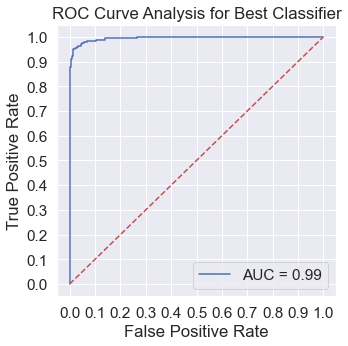

In [71]:
#Best Model ROC Curve

import sklearn.metrics as metrics

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
fig2 = plt.figure(figsize=(5,5))

plt.title('ROC Curve Analysis for Best Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comparison Cross_Val_Score_mean

In [ ]:
np.random.seed(seed=1)

kf = KFold(n_splits=10, shuffle=True)

scores1 = cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean()
scores2 = cross_val_score(model, X, y, cv=kf, scoring='precision').mean()
scores3 = cross_val_score(model, X, y, cv=kf, scoring='recall').mean()

In [73]:
data_kf = {'Metric':  ['Accuracy','Precision', 'Recall'],
        'EXtremeGradientBoosting':[scores1, scores2,scores3]
        }
comparison_kf = pd.DataFrame (data_kf, columns = ['Metric', 'EXtremeGradientBoosting'])
comparison_kf
        

,Metric,EXtremeGradientBoosting
0,Accuracy,0.982916
1,Precision,0.962469
2,Recall,0.925466


## 7. Future improvements
- which features are the most important

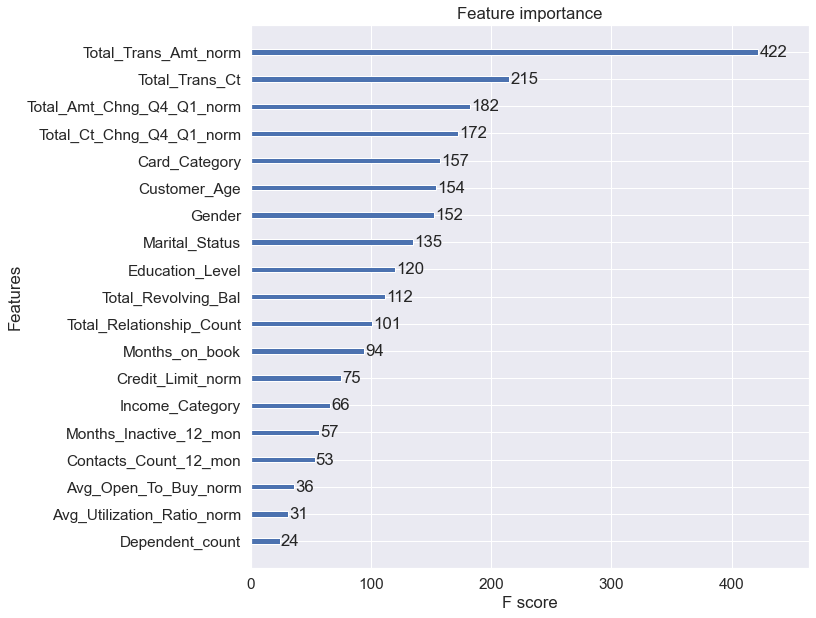

In [74]:
# use feature importance for feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from numpy import sort
from xgboost import plot_importance

#Feature Importance for the best model

fig, ax = plt.subplots(figsize=(10,10))
plot_importance(model, ax = ax)
plt.show()


### Saving the file with Pickle

In [77]:
filename = 'Notebook_training'
pickle.dump(model, open(filename,'wb'))